In [2]:
import numpy as np
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="user_img_enc.tflite")
interpreter.allocate_tensors()

In [3]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
print(output_details)



# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)



[{'name': 'serving_default_data:0', 'index': 0, 'shape': array([  1, 256, 192,   3]), 'shape_signature': array([ -1, 256, 192,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 268, 'shape': array([  1, 256, 192,   1]), 'shape_signature': array([ -1, 256, 192,   1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[[[[0.02187849]
   [0.0027337 ]
   [0.00157629]
   ...
   [0.00251609]
   [0.00690445]
   [0.03481485]]

  [[0.00398702]
   [0.00027151]
   [0.00010039]
   ...
   [0.00022466]
   [0.00046032]
   [0.0024953 ]]

  [[0.00161493]
   [0.00029359]
   [0.00012633]
   ...
   [0.00048083]
   [0.0007

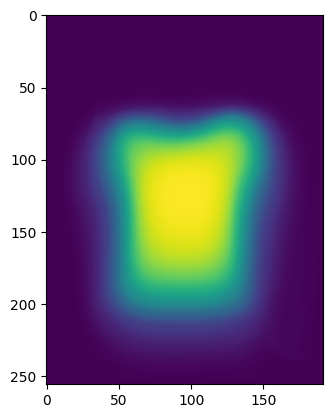

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Load TFLite model and allocate tensors.
plt.imshow(np.squeeze(output_data))
plt.show()


In [5]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

def load_image(img_path, channels=3):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img,
                                # channels=channels
                                )
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

[  1 256 192   3]
[[[[0.02534024]
   [0.01094244]
   [0.00944746]
   ...
   [0.03202189]
   [0.02856588]
   [0.0490125 ]]

  [[0.00969611]
   [0.00614497]
   [0.00434745]
   ...
   [0.01722777]
   [0.01179715]
   [0.03333755]]

  [[0.00569762]
   [0.00304489]
   [0.0028086 ]
   ...
   [0.00750258]
   [0.00583495]
   [0.01365404]]

  ...

  [[0.0146747 ]
   [0.00791673]
   [0.00545331]
   ...
   [0.00369288]
   [0.00670801]
   [0.0204428 ]]

  [[0.04617498]
   [0.01505421]
   [0.00542757]
   ...
   [0.00381953]
   [0.00854684]
   [0.04608776]]

  [[0.08370078]
   [0.03268668]
   [0.01732762]
   ...
   [0.01119013]
   [0.04413718]
   [0.1755144 ]]]]


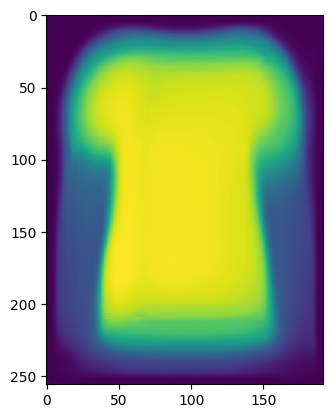

In [6]:
#outfit_enc

interpreter2 = tf.lite.Interpreter(model_path="outfit_enc.tflite")
interpreter2.allocate_tensors()

# Get input and output tensors.
input_details2 = interpreter2.get_input_details()
output_details2 = interpreter2.get_output_details()

# Test the model on random input data.
input_shape = input_details2[0]['shape']
print(input_shape)

# change the following line to feed into your own data.
input_data = load_image('baju.jpg', input_shape)
interpreter2.set_tensor(input_details2[0]['index'], input_data)

interpreter2.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data2 = interpreter2.get_tensor(output_details2[0]['index'])
print(output_data2)

plt.imshow(output_data2[0])
plt.show()

In [7]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')






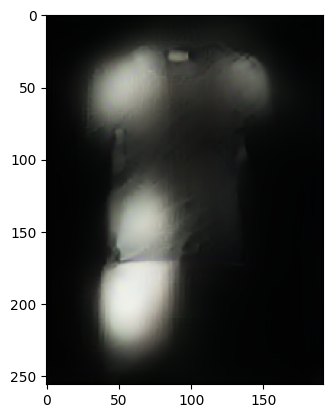

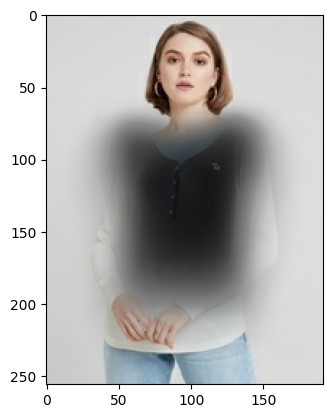

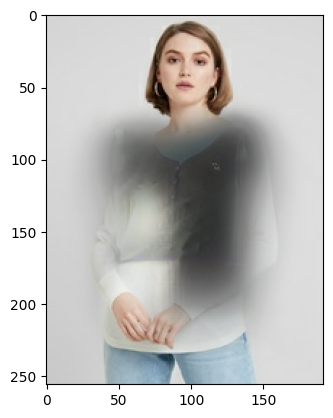

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub

# Assuming you have defined the 'load_image' function to load the image as an array.

# Step 1: Load the user image and get its output tensor.
user_image = load_image('foto_putih.jpg')
output = interpreter.get_tensor(output_details[0]['index'])
mask_user = np.squeeze(output * user_image)
mask_user = np.expand_dims(mask_user, axis=0)

# Step 2: Load the style image and crop based on the output tensor shape.
style_image = load_image('baju.jpg')
output2 = interpreter2.get_tensor(output_details2[0]['index'])
mask_style = np.squeeze(output2 * style_image)
mask_style = np.expand_dims(mask_style, axis=0)

# Step 3: Stylize the user image with the style image.
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = model(tf.constant(mask_style), tf.constant(mask_user))[0][0]
plt.imshow(np.squeeze(stylized_image))
plt.show()

# Step 4: Reverse the user mask.
mask_user_reversed = 1 - mask_user

# Step 5: Combine the user image and the stylized image using the masks.
stylized_image = np.expand_dims(stylized_image, axis=0)
user_masked = user_image * mask_user_reversed
plt.imshow(np.squeeze(user_masked))
plt.show()



